In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def is_in_qpd_quadrant(qpd_diameter, quadrant_id):
    def is_inside_qpd(qpd_diameter):
        r = (xg**2 + yg**2)**0.5
        return r <= qpd_diameter / 2

    def is_in_quadrant(quadrant_id):
        g = qpd_gap / 2
        if quadrant_id == 1:
            return (xg < -g) & (yg > g)
        elif quadrant_id == 2:
            return (xg > g) & (yg > g)
        elif quadrant_id == 3:
            return (xg > g) & (yg < -g)
        elif quadrant_id == 4:
            return (xg < -g) & (yg < -g)
        else:
            print('Invalid quadrant_id in is_in_quadrant()')

    return is_inside_qpd(qpd_diameter) & is_in_quadrant(quadrant_id)


def define_beam(beam_pos, beam_cutoff_diameter, beam_type):
    def uniform_beam(beam_pos, beam_cutoff_diameter):
        beam = np.ones_like(xg)
        beam[~is_inside_beam_cutoff(beam_pos, beam_cutoff_diameter)] = 0
        return beam

    def gaussian_beam(beam_pos, beam_cutoff_diameter, gaussian_width):
        bx = beam_pos[0]
        by = beam_pos[1]

        sigma_x = gaussian_width
        sigma_y = gaussian_width

        dx = (xg - bx)**2 / (2 * sigma_x**2)
        dy = (yg - by)**2 / (2 * sigma_y**2)
        
        beam = np.exp(-(dx + dy))

        beam[~is_inside_beam_cutoff(beam_pos, beam_cutoff_diameter)] = 0
        return beam

    def is_inside_beam_cutoff(beam_pos, beam_cutoff_diameter):
        bx = beam_pos[0]
        by = beam_pos[1]
        r = ((xg - bx)**2 + (yg - by)**2)**0.5
        return r <= beam_cutoff_diameter / 2

    if beam_type == 'uniform':
        return uniform_beam(beam_pos, beam_cutoff_diameter)
    elif beam_type == 'gaussian':
        gaussian_width = beam_cutoff_diameter / 2
        return gaussian_beam(beam_pos, beam_cutoff_diameter, gaussian_width)
    else:
        print('Invalid beam_type in define_beam()')


def evaluate_qpd(beam_pos, beam_cutoff_diameter, beam_type):
    def calc_qpd_outputs(q_count):
        Q1 = q_count[0]
        Q2 = q_count[1]
        Q3 = q_count[2]
        Q4 = q_count[3]
        Xdiff = (Q2 + Q3) - (Q4 + Q1)
        Ydiff = (Q1 + Q2) - (Q3 + Q4)
        SUM = Q1 + Q2 + Q3 + Q4
        return Xdiff, Ydiff, SUM

    def normalise_qpd(Xdiff, Ydiff, SUM):
        X = Xdiff / SUM
        Y = Ydiff / SUM
        return X, Y

    def integrate_quadrants(beam_pos, beam_cutoff_diameter, beam_type):
        q_count = np.zeros(4)
        for i in range(0, 4):
            quadrant_id = i + 1
            b = define_beam(beam_pos, beam_cutoff_diameter, beam_type)
            b1 = b[is_in_qpd_quadrant(qpd_diameter, quadrant_id)]
            q_count[i] = np.sum(b1)
            #q_count[i] = np.sum(is_inside_beam(beam_pos, beam_diameter) & is_inside_qpd(qpd_diameter) & is_in_quadrant(quadrant_id))
        return q_count

    q_count = integrate_quadrants(beam_pos, beam_cutoff_diameter, beam_type)
    Xdiff, Ydiff, SUM = calc_qpd_outputs(q_count)
    X, Y = normalise_qpd(Xdiff, Ydiff, SUM)
    return X, Y, SUM

In [14]:
x = np.arange(-10, 10, 0.05)
y = np.arange(-5, 5, 0.05)
xg, yg = np.meshgrid(x, y)

qpd_diameter = 7.8 # [mm]
qpd_gap = 0.1 # mm

In [15]:
beam_pos = (0, 0)
beam_diameter = 8
beam_type = 'uniform' # 'uniform' or 'gaussian'
X, Y, SUM = evaluate_qpd(beam_pos, beam_diameter, beam_type)
print(X, Y, SUM)

0.008060589667297809 -0.008276981336218556 18485.0


In [29]:
beam_diameter = 6 # ideally qpd_diameter / 2
beam_type = 'gaussian' # 'uniform' or 'gaussian'

# set beam positions for iteration:
bx_array = np.arange(-6, 6, 0.1) 
by_array = np.zeros_like(bx_array)

qpd_X = np.zeros_like(by_array)
qpd_Y= np.zeros_like(by_array)
qpd_SUM = np.zeros_like(by_array)

for i in range(len(by_array)):
    beam_pos = (bx_array[i], by_array[i])
    qpd_X[i], qpd_Y[i], qpd_SUM[i] = evaluate_qpd(beam_pos, beam_diameter, beam_type)


bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-sweep_bd=6.00\000_bt=uniform_x-sweep_bx=-6.0_by=0.0_bd=6.00.png
bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-sweep_bd=6.00\001_bt=uniform_x-sweep_bx=-5.9_by=0.0_bd=6.00.png
bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-sweep_bd=6.00\002_bt=uniform_x-sweep_bx=-5.8_by=0.0_bd=6.00.png
bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-sweep_bd=6.00\003_bt=uniform_x-sweep_bx=-5.7_by=0.0_bd=6.00.png
bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-sweep_bd=6.00\004_bt=uniform_x-sweep_bx=-5.6_by=0.0_bd=6.00.png
bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-sweep_bd=6.00\005_bt=uniform_x-sweep_bx=-5.5_by=0.0_bd=6.00.png
bt=uniform_x-sweep_bd=6.00
figures\bt=uniform_x-sweep_bd=6.00
True
figures\bt=uniform_x-

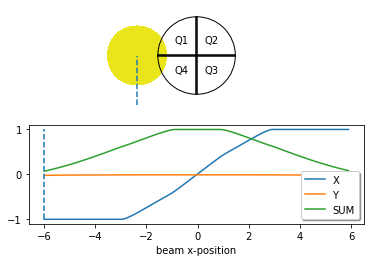

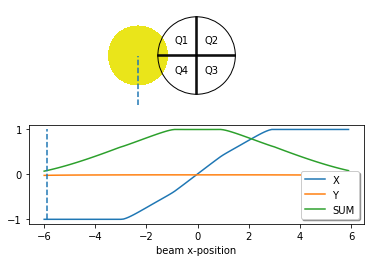

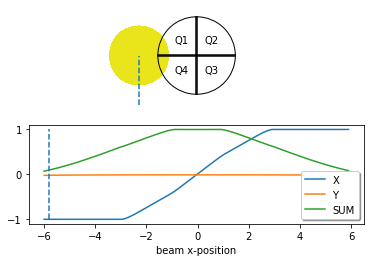

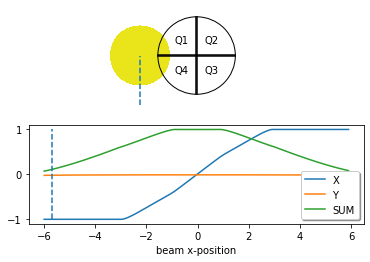

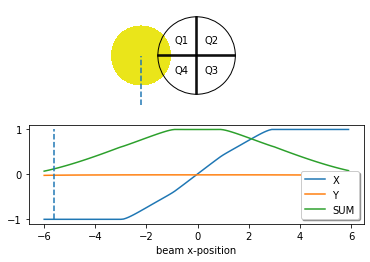

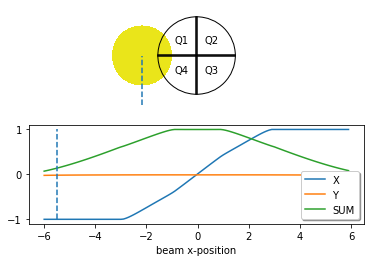

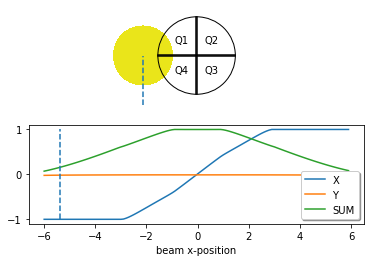

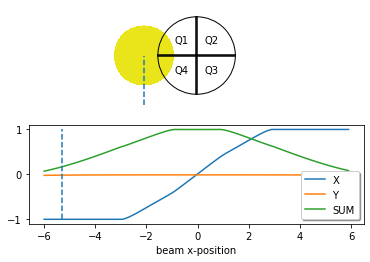

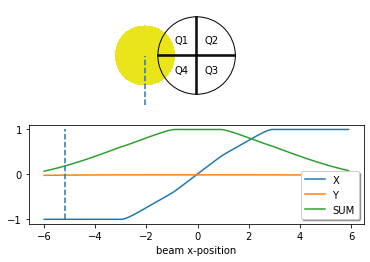

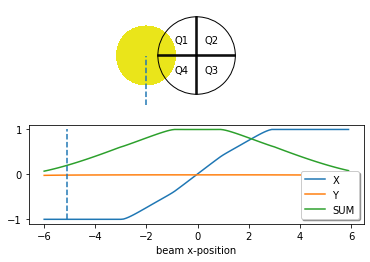

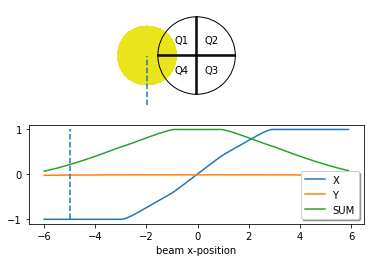

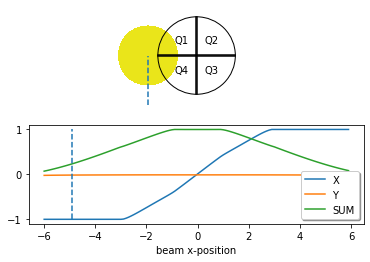

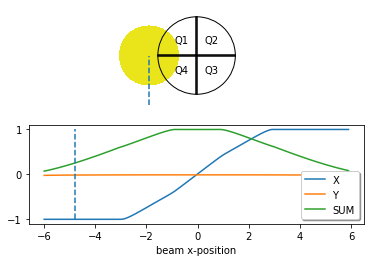

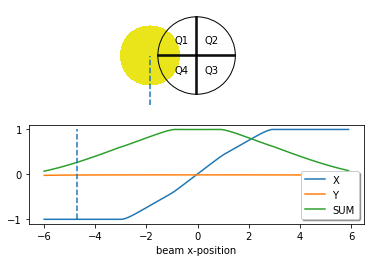

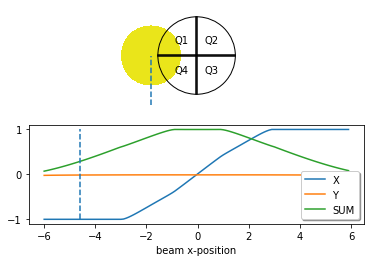

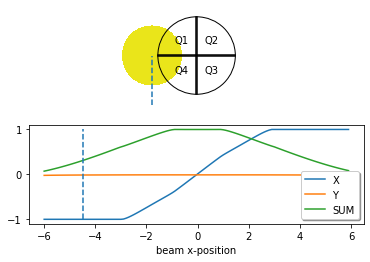

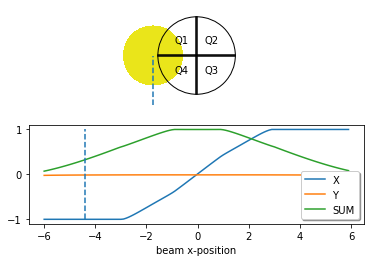

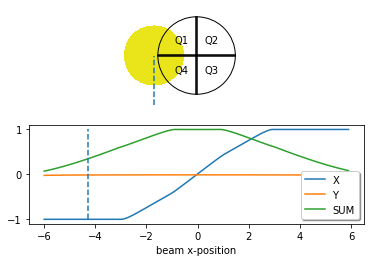

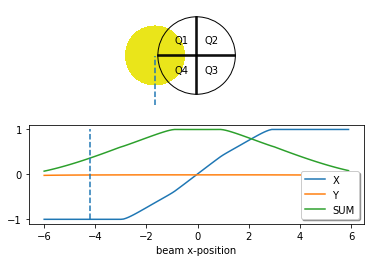

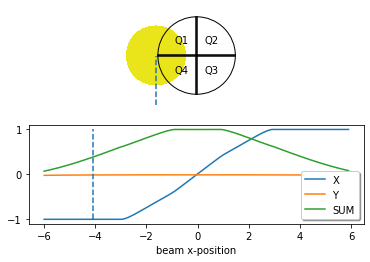

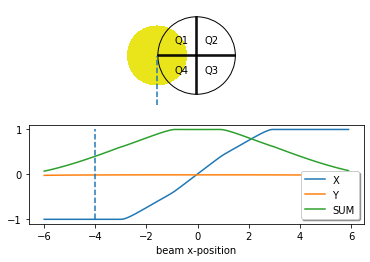

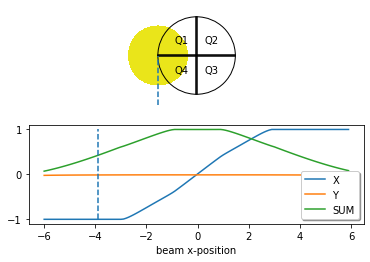

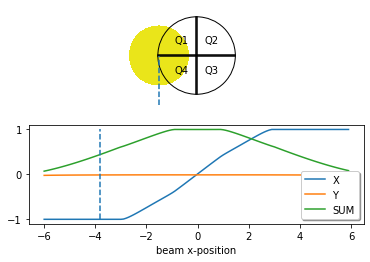

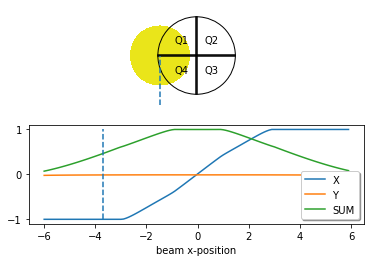

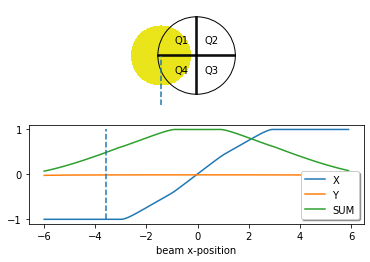

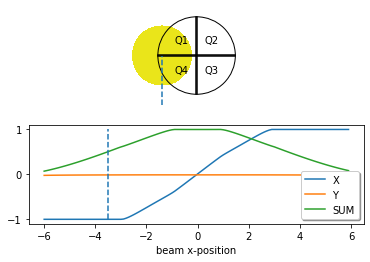

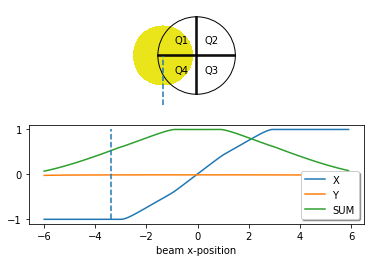

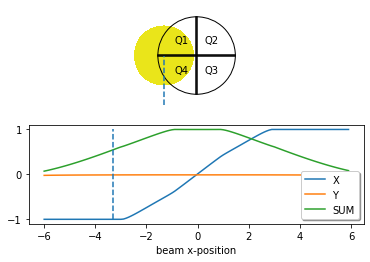

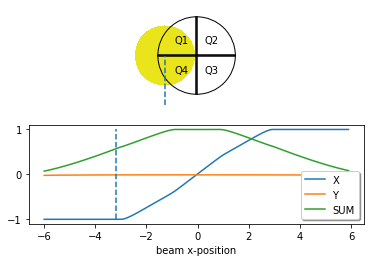

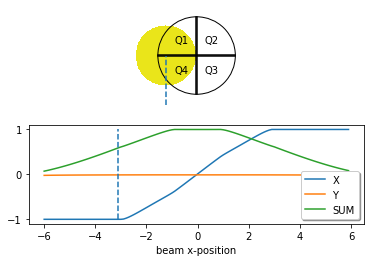

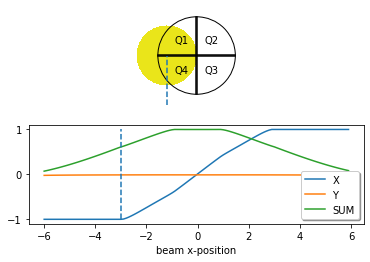

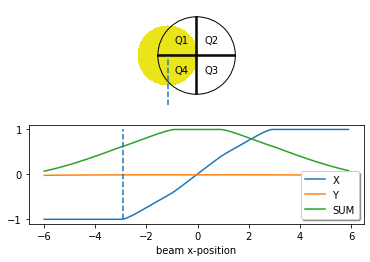

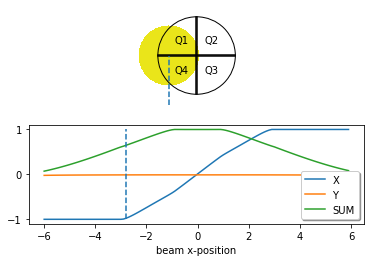

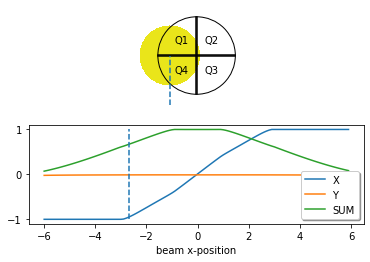

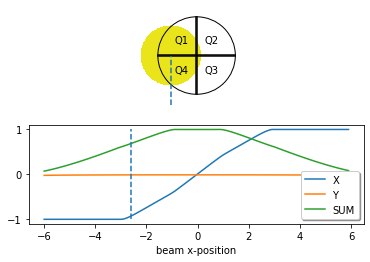

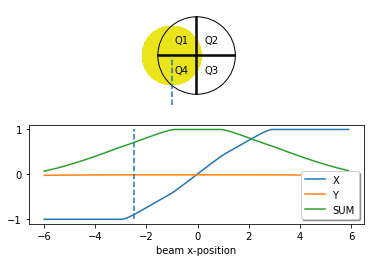

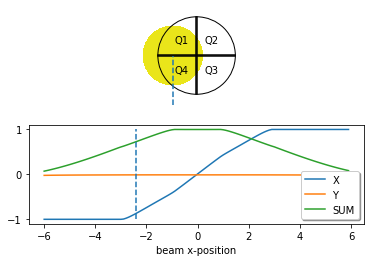

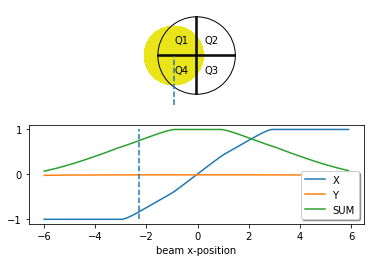

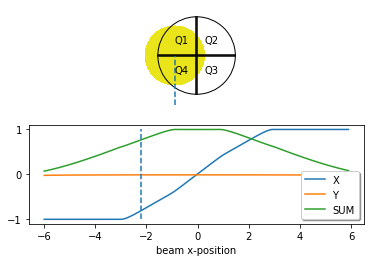

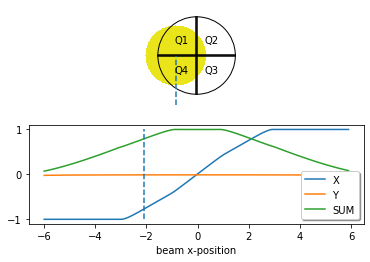

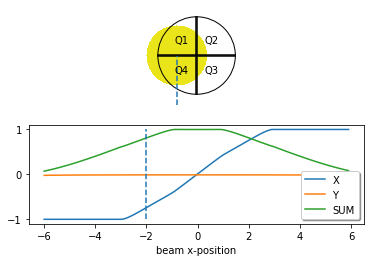

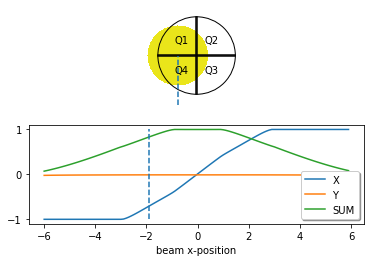

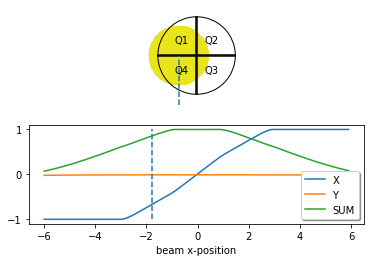

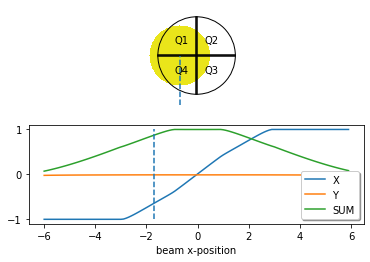

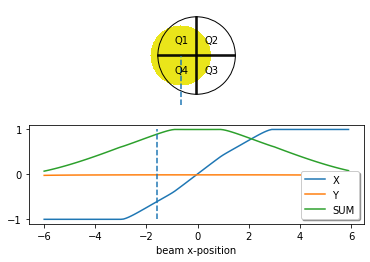

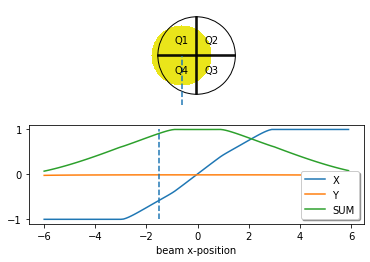

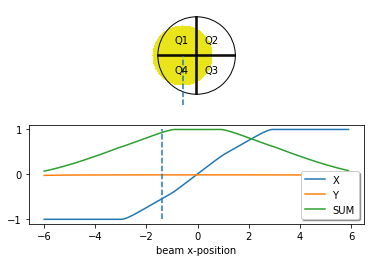

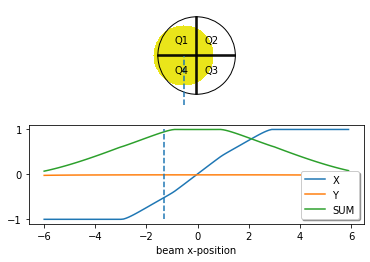

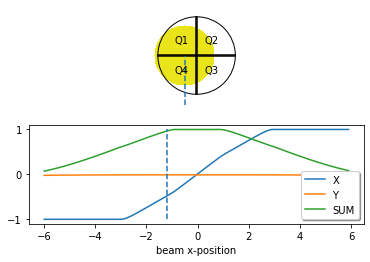

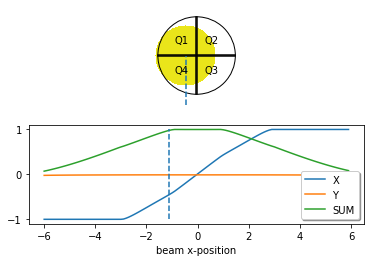

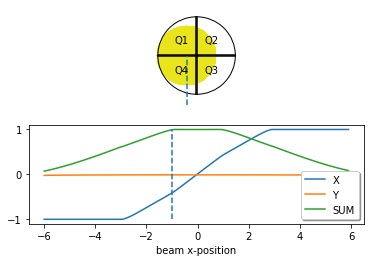

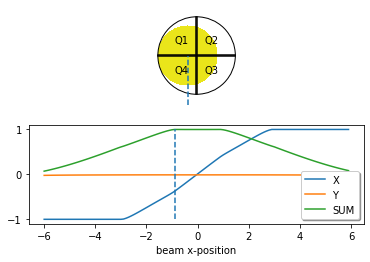

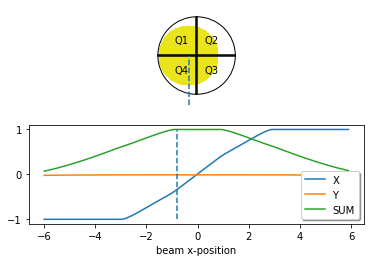

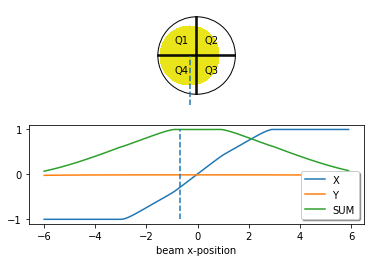

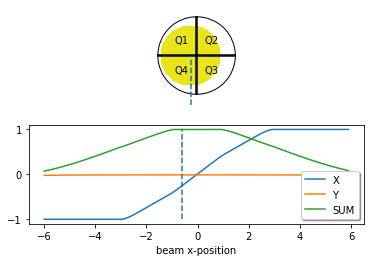

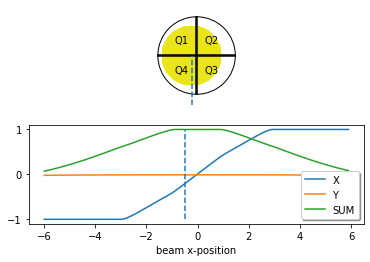

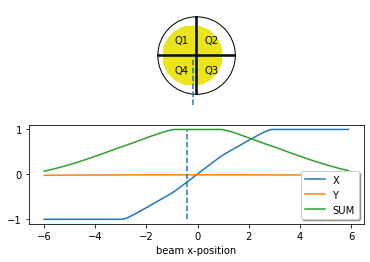

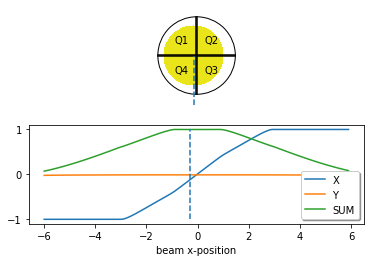

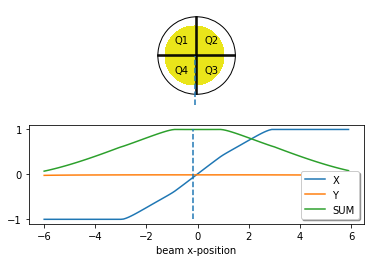

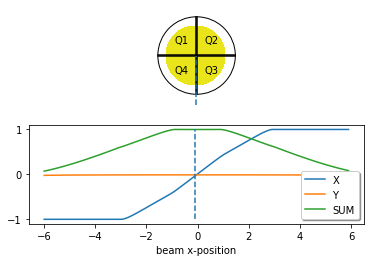

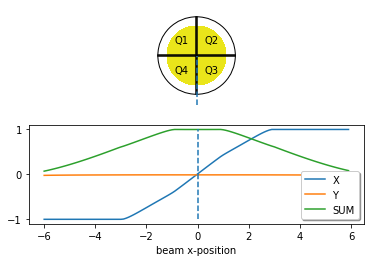

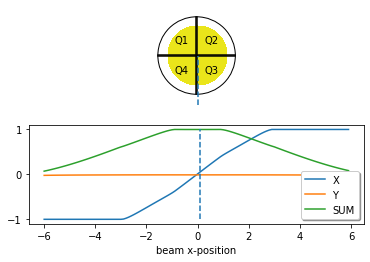

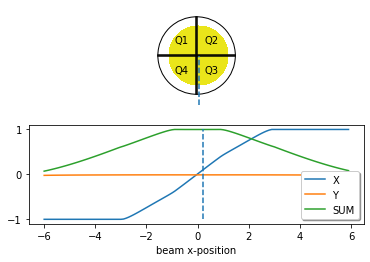

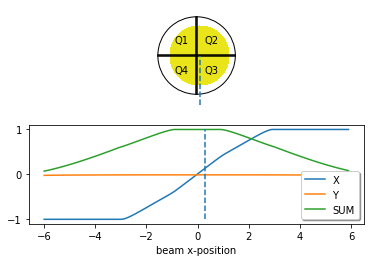

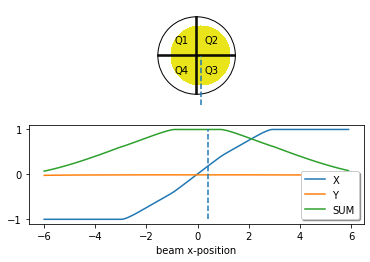

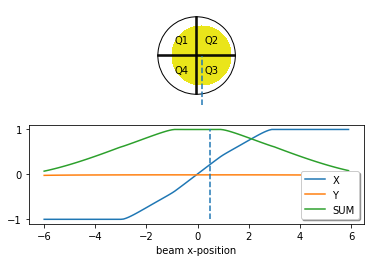

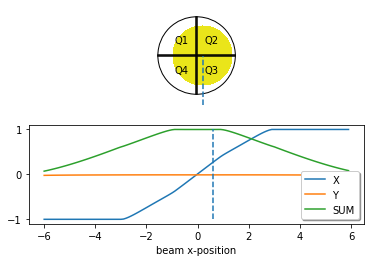

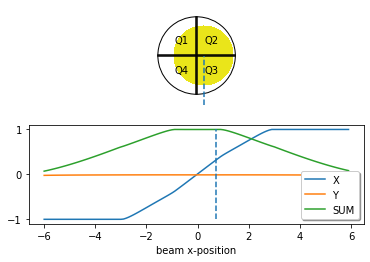

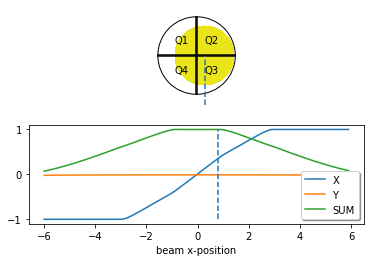

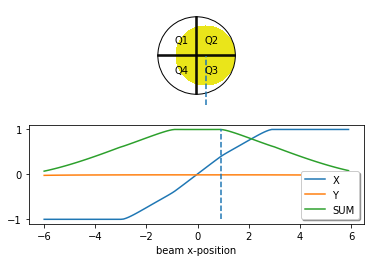

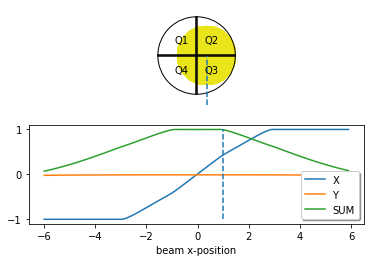

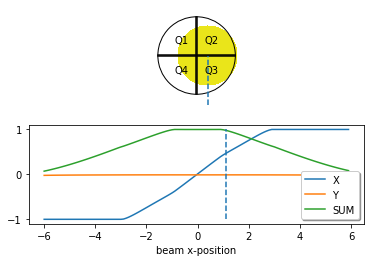

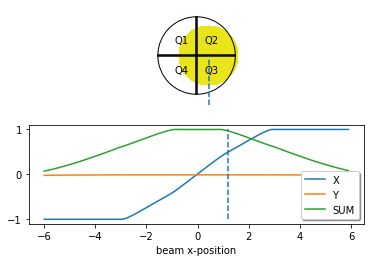

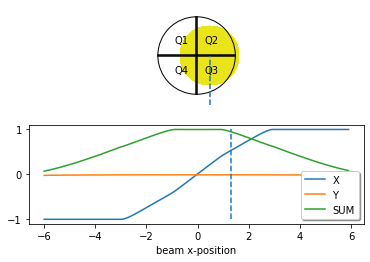

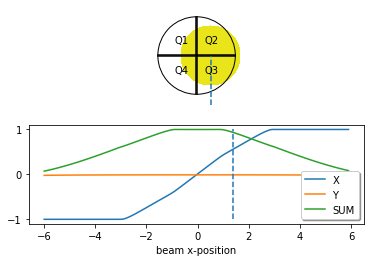

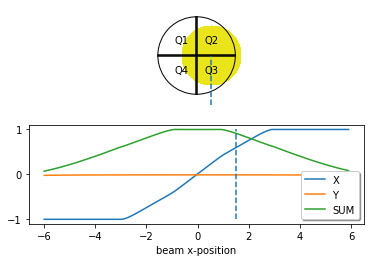

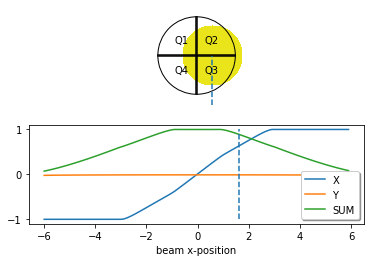

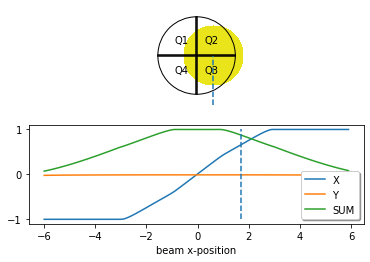

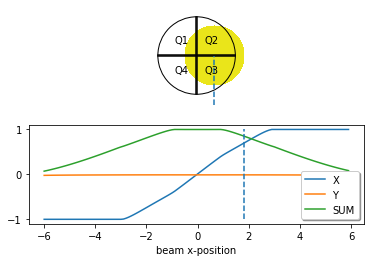

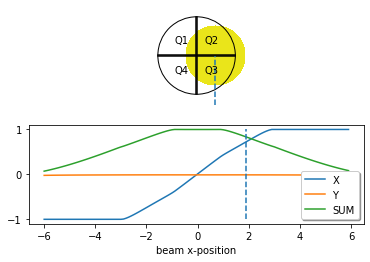

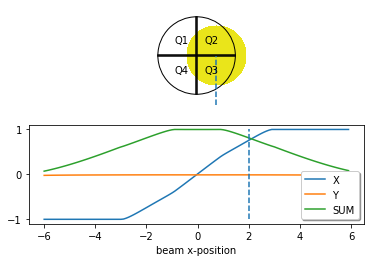

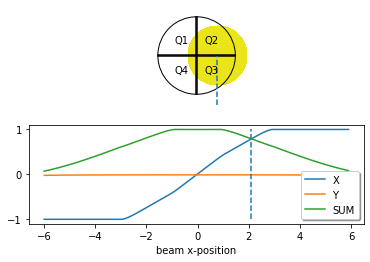

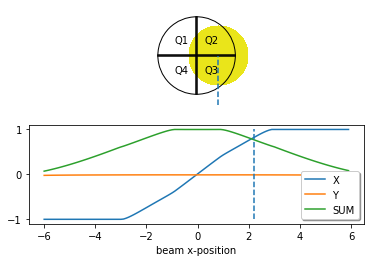

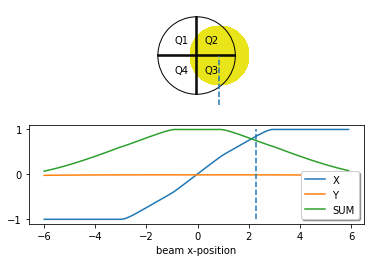

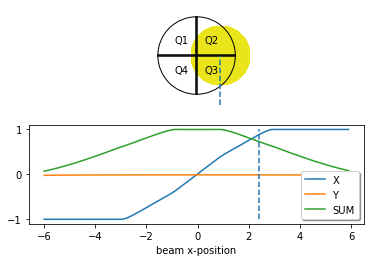

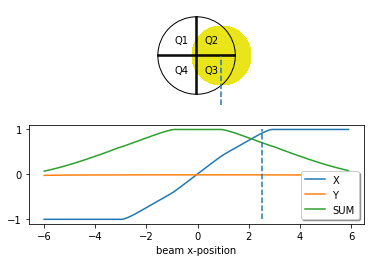

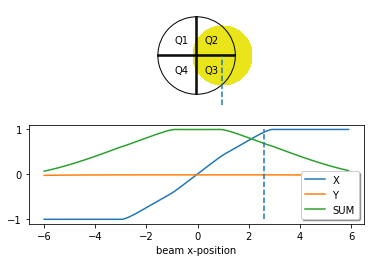

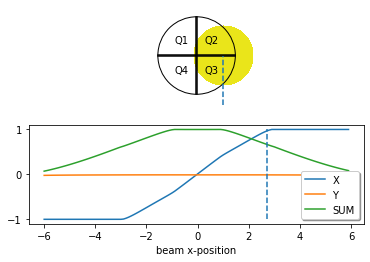

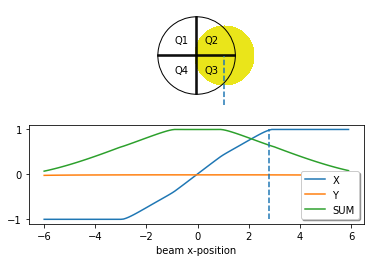

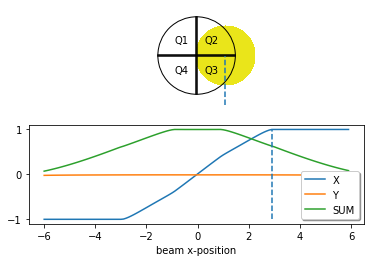

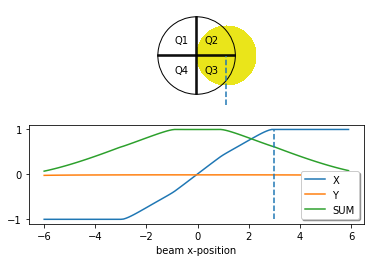

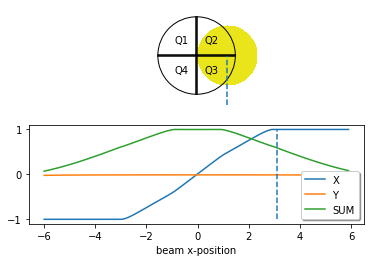

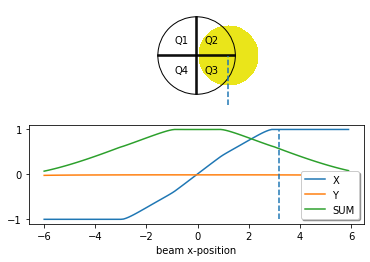

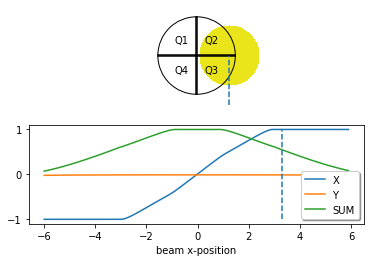

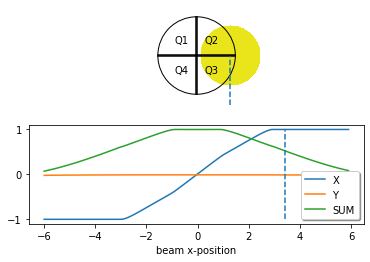

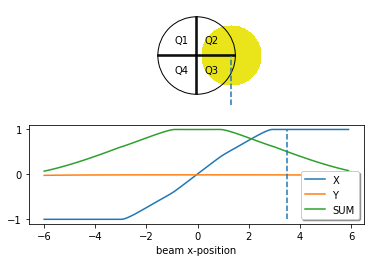

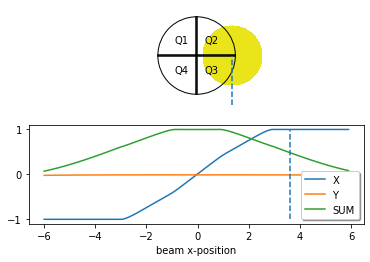

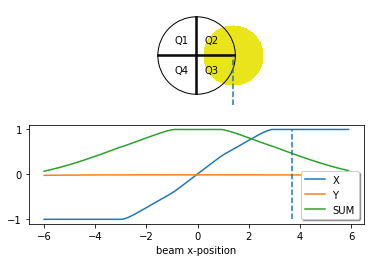

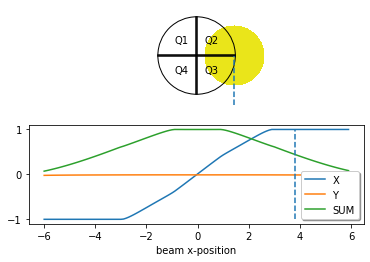

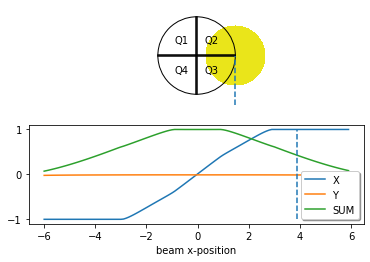

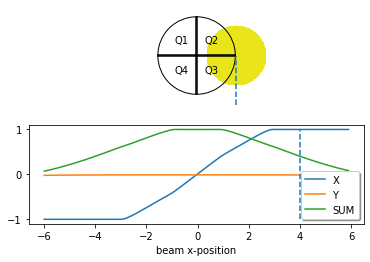

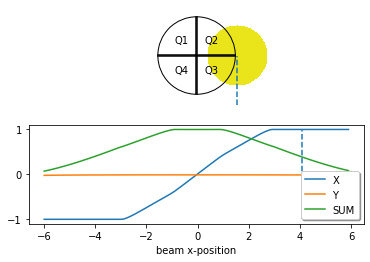

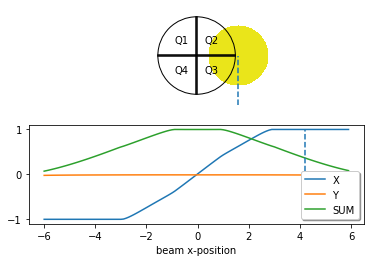

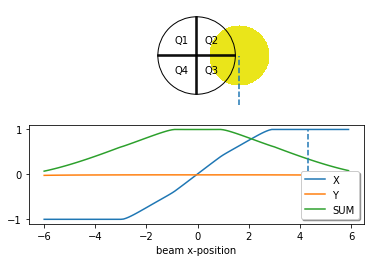

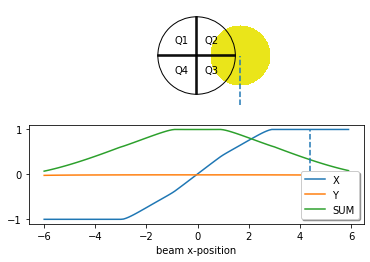

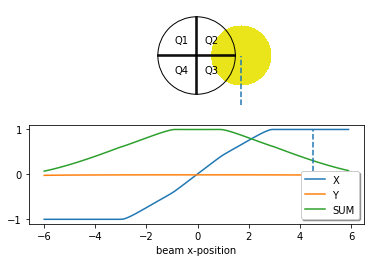

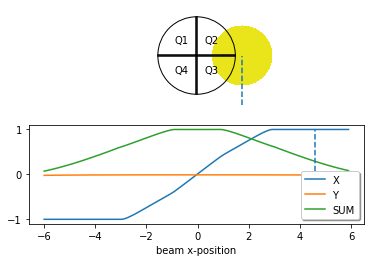

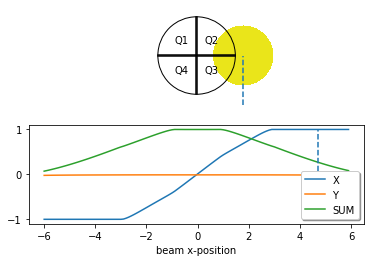

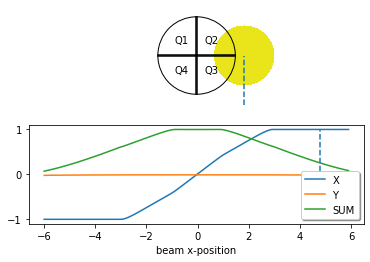

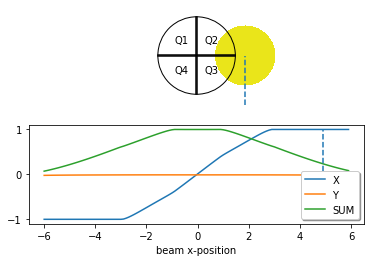

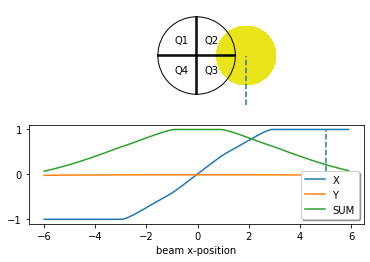

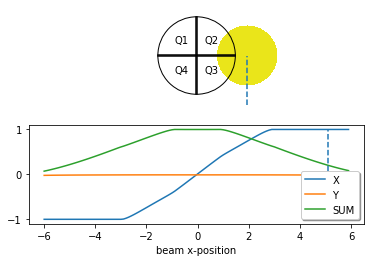

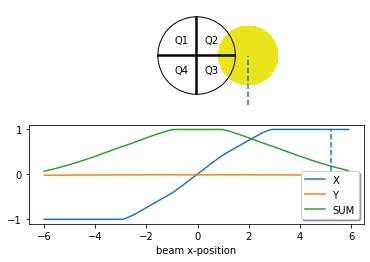

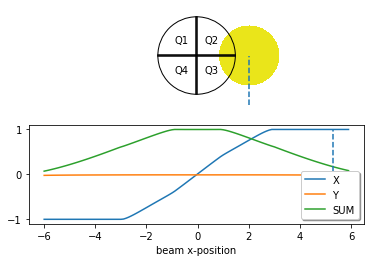

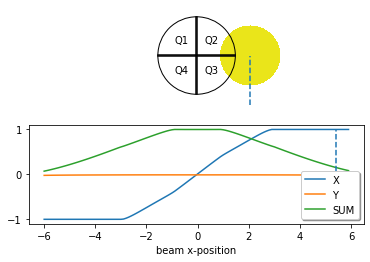

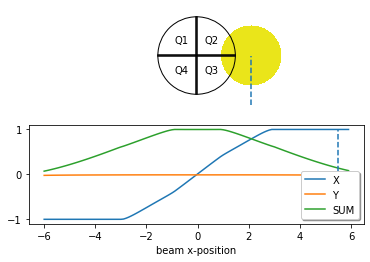

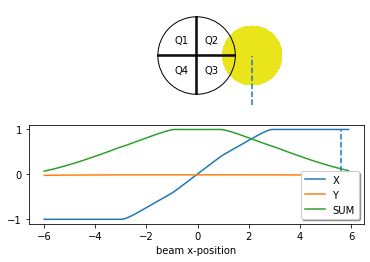

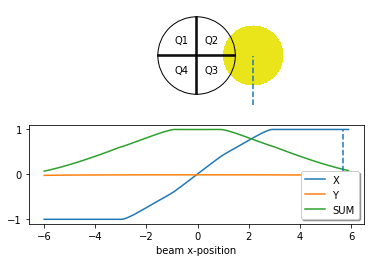

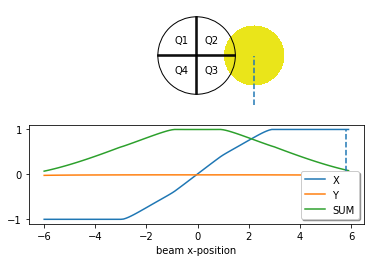

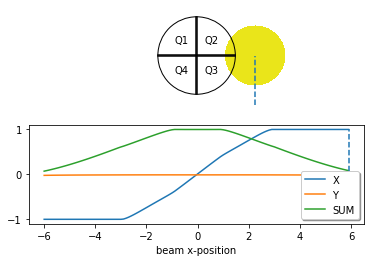

In [48]:
def plot_qpd_diagram(beam_pos, sweep_axis):
    fig, ax = plt.subplots(2, 1)

    # Beam
    z = define_beam(beam_pos, beam_diameter, beam_type)
    z[z==0] = np.nan
    n_levels = 15
    levels = np.linspace(0, 1, n_levels + 1)
    ax[0].contourf(xg, yg, z, levels=levels)
    #beam = plt.Circle((beam_pos), beam_diameter / 2, color='g', fill=True)
    #ax[0].add_artist(beam)
 
    # QPD
    qpd = plt.Circle((0, 0), qpd_diameter / 2, color='k', fill=False)
    ax[0].add_artist(qpd)

    ax[0].plot([-qpd_diameter / 2, qpd_diameter/2], [qpd_gap/2, qpd_gap/2], color='k') # top horizontal line
    ax[0].plot([-qpd_diameter / 2, qpd_diameter/2], [-qpd_gap/2, -qpd_gap/2], color='k') # bottom horizontal line
    ax[0].plot([qpd_gap/2, qpd_gap/2], [-qpd_diameter / 2, qpd_diameter/2], color='k') # right vertical line
    ax[0].plot([-qpd_gap/2, -qpd_gap/2], [-qpd_diameter / 2, qpd_diameter/2], color='k') # left vertical line

    ax[0].text(-1.5, 1.5, 'Q1', horizontalalignment='center', verticalalignment='center')
    ax[0].text(1.5, 1.5, 'Q2', horizontalalignment='center', verticalalignment='center')
    ax[0].text(1.5, -1.5, 'Q3', horizontalalignment='center', verticalalignment='center')
    ax[0].text(-1.5, -1.5, 'Q4', horizontalalignment='center', verticalalignment='center')

    ax[0].axis('equal')
    #ax[0].set(ylim=(-6, 6))
    ax[0].axis('off')

    if sweep_axis == 'x':
        ax[1].plot(bx_array, qpd_X, label='X')
        ax[1].plot(bx_array, qpd_Y, label='Y')
        ax[1].plot(bx_array, qpd_SUM/np.max(qpd_SUM), label='SUM')
        ax[0].plot([beam_pos[0], beam_pos[0]], [-5, 0], color='C0', linestyle='--') # vertical dotted line on beam midpoint
        ax[1].plot([beam_pos[0], beam_pos[0]], [-1, 1], color='C0', linestyle='--') # vertical dotted line on graph
        ax[1].set_xlabel('beam x-position')
    elif sweep_axis == 'y':
        ax[1].plot(by_array, qpd_X)
        ax[1].plot(by_array, qpd_Y)
        ax[1].plot(by_array, qpd_SUM/np.max(qpd_SUM))
        ax[0].plot([-5, 0], [beam_pos[1], beam_pos[1]], color='C1', linestyle='--') # horizontal dotted line on beam midpoint
        ax[1].plot([beam_pos[1], beam_pos[1]], [-1, 1], color='C1', linestyle='--') # vertical dotted line on graph

    legend = ax[1].legend(loc='lower right', shadow=True)
    #plt.show() 

    # naming files
    fig_name = ('{:0>3d}'.format(i) + '_bt=' + beam_type
        + '_' + sweep_axis 
        + '-sweep_bx={:.1f}'.format(beam_pos[0]) + '_by={:.1f}'.format(beam_pos[1])
        + '_bd={:.2f}'.format(beam_diameter)) 
    folder_name = ('bt=' + beam_type 
        + '_' + sweep_axis + '-sweep'
        + '_bd={:.2f}'.format(beam_diameter))
    folder_path = os.path.join('figures', folder_name)
    if not(os.path.exists(folder_path)):
        os.mkdir(folder_path)
    fig_path = os.path.join(folder_path, f'{fig_name}.png')
    plt.savefig(fig_path, format='png')

for i in range(0, len(by_array), 1):
    beam_pos = (bx_array[i], by_array[i])
    plot_qpd_diagram(beam_pos, 'x')

In [ ]:
plt.plot(bx_array, qpd_X)
plt.plot(bx_array, qpd_Y)
plt.plot(bx_array, qpd_SUM/np.max(qpd_SUM))

In [ ]:
plt.scatter(xg, yg, c=a)
plt.axis('equal')
plt.show()